In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Heaviside
def Hvs(t, ti):
    if t > ti:
        output = 1.
    else:
        output = 0.
    return output

In [32]:
# LIF neuron with CuBa synapse
def lif_cuba(t, tau_m, tau_s, cm, t_n1, t_n2, t_n3, w_n1, w_n2, w_n3):

    # neurons
    n1 = w_n1 * Hvs(t, t_n1) * ( np.exp( (t_n1 - t) / tau_m)  - np.exp( (t_n1 - t) / tau_s) )
    n2 = w_n2 * Hvs(t, t_n2) * ( np.exp( (t_n2 - t) / tau_m)  - np.exp( (t_n2 - t) / tau_s) )
    n3 = w_n3 * Hvs(t, t_n3) * ( np.exp( (t_n3 - t) / tau_m)  - np.exp( (t_n3 - t) / tau_s) )

    # normal case
    if tau_s != tau_m:
        prefix = tau_m * tau_s / ( cm * (tau_m - tau_s))   
        output = prefix * (n1 + n2 + n3)
    
    # special case, use l'hospital (see results_06_02_l_hospital.pdf)
    if tau_s == tau_m:
        n1_dtau_s = w_n1 * Hvs(t, t_n1) * ( (t_n1 - t) / tau_s**2 * np.exp( (t_n1 - t) / tau_s) )
        n2_dtau_s = w_n2 * Hvs(t, t_n2) * ( (t_n2 - t) / tau_s**2 * np.exp( (t_n2 - t) / tau_s) )
        n3_dtau_s = w_n3 * Hvs(t, t_n3) * ( (t_n3 - t) / tau_s**2 * np.exp( (t_n3 - t) / tau_s) )
        sum1 = tau_m * (n1 + n2 + n3)
        sum2 = tau_m * tau_s * (n1_dtau_s + n2_dtau_s + n3_dtau_s)
        output = - (sum1 + sum2) / cm

    return output

In [33]:
# define neuron params
# notes: 
# the 10^-9 of cm and w_i cancels out
# the 10^-3 of the t's will lead to a result * 10-^3 (= mV)

t_n1 = 1.
w_n1 = 3.

t_n2 = 5.
w_n2 = -2.

t_n3 = 3.
w_n3 = 4.

cm = 1.
tau_m = 4.

In [34]:
# define sim params
t1 = 4.
t2 = 6.

tau_s1 = 2.
tau_s2 = 4.

In [35]:
# run sim
u1 = lif_cuba(t1, tau_m, tau_s1, cm, t_n1, t_n2, t_n3, w_n1, w_n2, w_n3)
u2 = lif_cuba(t1, tau_m, tau_s2, cm, t_n1, t_n2, t_n3, w_n1, w_n2, w_n3)
u3 = lif_cuba(t2, tau_m, tau_s1, cm, t_n1, t_n2, t_n3, w_n1, w_n2, w_n3)
u4 = lif_cuba(t2, tau_m, tau_s2, cm, t_n1, t_n2, t_n3, w_n1, w_n2, w_n3)

print('t = ', t1, 'ms, tau_s = ', tau_s1, 'ms, u = ', u1, 'mV')
print('t = ', t1, 'ms, tau_s = ', tau_s2, 'ms, u = ', u2, 'mV')
print('t = ', t2, 'ms, tau_s = ', tau_s1, 'ms, u = ', u3, 'mV')
print('t = ', t2, 'ms, tau_s = ', tau_s2, 'ms, u = ', u4, 'mV')

t =  4.0 ms, tau_s =  2.0 ms, u =  5.747158684851362 mV
t =  4.0 ms, tau_s =  4.0 ms, u =  7.366502106954751 mV
t =  6.0 ms, tau_s =  2.0 ms, u =  5.062658873446682 mV
t =  6.0 ms, tau_s =  4.0 ms, u =  8.408369019652216 mV


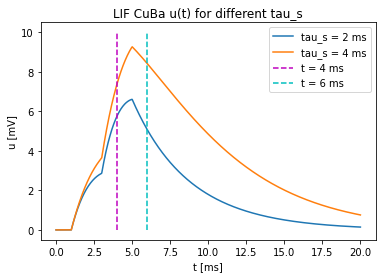

In [37]:
# plot it with curves (just for visualization purposes)
t_p = np.linspace(0, 20, 1000)
u1_p = np.zeros_like(t_p)
u2_p = np.zeros_like(t_p)

for i in range(t_p.size):
    u1_p[i] = lif_cuba(t_p[i], tau_m, tau_s1, cm, t_n1, t_n2, t_n3, w_n1, w_n2, w_n3)
    u2_p[i] = lif_cuba(t_p[i], tau_m, tau_s2, cm, t_n1, t_n2, t_n3, w_n1, w_n2, w_n3)

plt.plot(t_p, u1_p, label='tau_s = 2 ms')
plt.plot(t_p, u2_p, label='tau_s = 4 ms')
plt.vlines(4, 0, 10, colors='m', linestyles='dashed', label='t = 4 ms')
plt.vlines(6, 0, 10, colors='c', linestyles='dashed', label='t = 6 ms')
plt.xlabel('t [ms]')
plt.ylabel('u [mV]')
plt.title('LIF CuBa u(t) for different tau_s')
plt.legend()